![Hand with calculator](calculator.jpg)

Did you know that the average return from investing in stocks is [10% per year](https://www.nerdwallet.com/article/investing/average-stock-market-return) (not accounting for inflation)? But who wants to be average?! 

You have been asked to support an investment firm by analyzing trends in high-growth companies. They are interested in understanding which industries are producing the highest valuations and the rate at which new high-value companies are emerging. Providing them with this information gives them a competitive insight as to industry trends and how they should structure their portfolio looking forward.

You have been given access to their `unicorns` database, which contains the following tables:

## dates
| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `company_id`   | A unique ID for the company.                 |
| `date_joined` | The date that the company became a unicorn.  |
| `year_founded` | The year that the company was founded.       |

## funding
| Column           | Description                                  |
|----------------- |--------------------------------------------- |
| `company_id`       | A unique ID for the company.                 |
| `valuation`        | Company value in US dollars.                 |
| `funding`          | The amount of funding raised in US dollars.  |
| `select_investors` | A list of key investors in the company.      |

## industries
| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `company_id`   | A unique ID for the company.                 |
| `industry`     | The industry that the company operates in.   |

## companies
| Column       | Description                                       |
|------------- |-------------------------------------------------- |
| `company_id`   | A unique ID for the company.                      |
| `company`      | The name of the company.                          |
| `city`         | The city where the company is headquartered.      |
| `country`      | The country where the company is headquartered.   |
| `continent`    | The continent where the company is headquartered. |


# The output

Your query should return a table in the following format:
| industry  | year | num\_unicorns       | average\_valuation\_billions |
| --------- | ---- | ------------------- | ---------------------------- |
| industry1 | 2021 |        ---          |             ---              |
| industry2 | 2020 |        ---          |             ---              |
| industry3 | 2019 |        ---          |             ---              |
| industry1 | 2021 |        ---          |             ---              |
| industry2 | 2020 |        ---          |             ---              |
| industry3 | 2019 |        ---          |             ---              |
| industry1 | 2021 |        ---          |             ---              |
| industry2 | 2020 |        ---          |             ---              |
| industry3 | 2019 |        ---          |             ---              |

Where `industry1`, `industry2`, and `industry3` are the three top-performing industries.

In [18]:
SELECT
      industry,
	  COUNT(*) AS no_companies
FROM industries
GROUP BY industry
ORDER BY no_companies DESC;

,industry,no_companies
0,Fintech,224
1,Internet software & services,205
2,E-commerce & direct-to-consumer,111
3,Artificial intelligence,84
4,Health,74
5,Other,58
6,"Supply chain, logistics, & delivery",57
7,Cybersecurity,50
8,Data management & analytics,41
9,Mobile & telecommunications,38


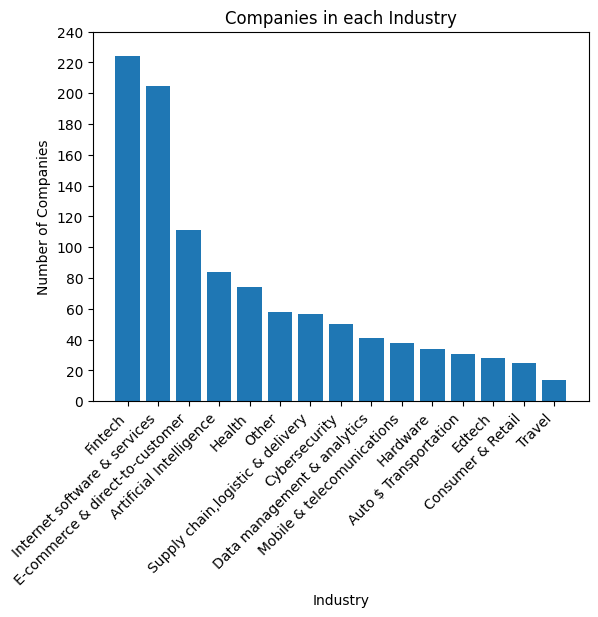

In [19]:
#import necessary modules
import numpy as np
import matplotlib.pyplot as plt

#data for plot
x = np.array(['Fintech','Internet software & services','E-commerce & direct-to-customer','Artificial Intelligence','Health','Other','Supply chain,logistic & delivery','Cybersecurity','Data management & analytics','Mobile & telecomunications','Hardware','Auto $ Transportation','Edtech','Consumer & Retail','Travel'])
y = np.array([224,205,111,84,74,58,57,50,41,38,34,31,28,25,14])

#title and type of plot
plt.title('Companies in each Industry')
bar = plt.bar(x,y)

#rotate the x-axis to 45 deg
plt.xticks(rotation = 45, ha = 'right')

#create subplot for the axes
fig = plt.gcf()
ax = plt.subplot(111)

#ax to customize labels
ax.set_xlabel('Industry')
ax.set_ylabel('Number of Companies')
ax.set_yticks(np.arange(0,251,20))

#show the plot
plt.show()

In [20]:
SELECT 
	 EXTRACT(year from date_joined) AS years,
	 count(*) AS no_of_companies
FROM dates
GROUP BY years
ORDER BY years;

,years,no_of_companies
0,2007,1
1,2011,2
2,2012,4
3,2013,3
4,2014,13
5,2015,35
6,2016,21
7,2017,44
8,2018,103
9,2019,104


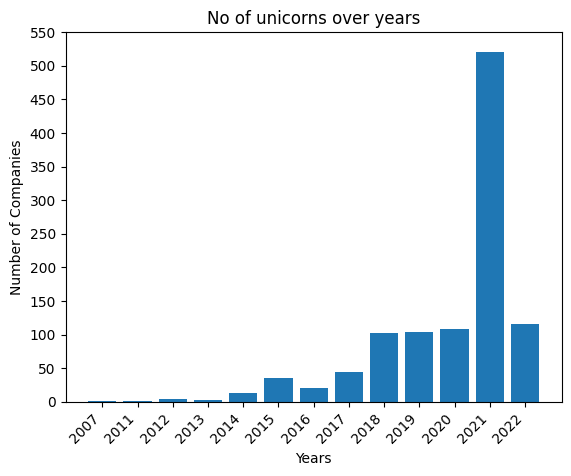

In [21]:
#data
x = ['2007','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
y = [1,2,4,3,13,35,21,44,103,104,108,520,116]

#Title and plot
plt.title('No of unicorns over years')
fig2 = plt.bar(x,y)

#rotate the x-axis to 45 deg
plt.xticks(rotation = 45, ha = 'right')

#create subplot for the axes
fig3 = plt.gcf()
ax = plt.subplot(111)

#ax to customize labels
ax.set_xlabel('Years')
ax.set_ylabel('Number of Companies')
ax.set_yticks(np.arange(0,551,50))

#show the plot
plt.show()


In [22]:
WITH CTE1 AS(
SELECT 
      i.industry,
      COUNT(*)
 FROM industries i
 INNER JOIN dates d
 USING (company_id)
 WHERE EXTRACT(year from date_joined) in (2019,2020,2021)
 GROUP BY i.industry
 ORDER BY COUNT(*) DESC
 LIMIT 3),
 
 CTE2 AS(
 SELECT 
       i.industry,
	   count(*) AS num_unicorns,
	   EXTRACT(year from date_joined) AS year,
	   ROUND(AVG(f.valuation/1000000000),2) AS average_valuation_billions
FROM industries i 
INNER JOIN dates d
USING (company_id)
inner join funding f
USING (company_id)
GROUP BY i.industry,year
HAVING EXTRACT(year from date_joined) in (2019,2020,2021)
ORDER BY num_unicorns DESC)

SELECT CTE2.industry,
       CTE2.year,
	   CTE2.num_unicorns,
	   CTE2.average_valuation_billions
FROM CTE2 
WHERE CTE2.year in (2019,2020,2021)
AND CTE2.industry in (SELECT industry FROM CTE1)

ORDER BY year DESC, num_unicorns DESC

 

,industry,year,num_unicorns,average_valuation_billions
0,Fintech,2021,138,2.75
1,Internet software & services,2021,119,2.15
2,E-commerce & direct-to-consumer,2021,47,2.47
3,Internet software & services,2020,20,4.35
4,E-commerce & direct-to-consumer,2020,16,4.00
5,Fintech,2020,15,4.33
6,Fintech,2019,20,6.80
7,Internet software & services,2019,13,4.23
8,E-commerce & direct-to-consumer,2019,12,2.58


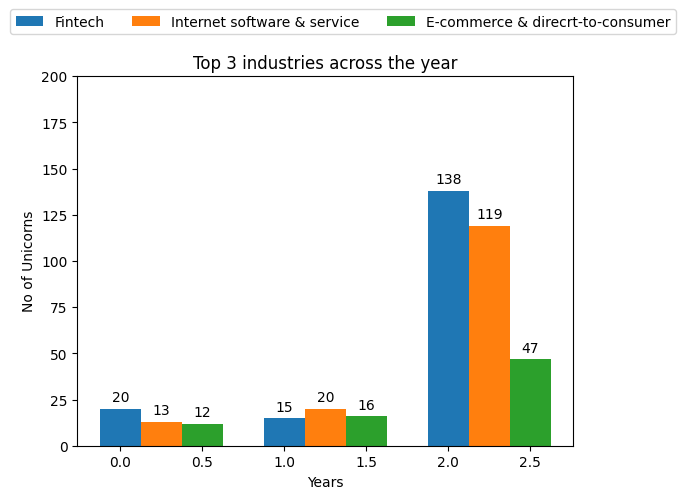

In [23]:
#data
years = (2019,2020,2021)
industry = {
    'Fintech':(20,15,138),
    'Internet software & service': (13,20,119),
    'E-commerce & direcrt-to-consumer':(12,16,47)
}

#label location
x = np.arange(len(years))
width = 0.25   #width of bar
multiplier = 0 #locaiton of the bar

#plot subplot
fig, ax = plt.subplots()


for attribute, measurement in industry.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label = attribute)
    ax.bar_label(rects, padding=3)
    multiplier +=1
    
#additional details
ax.set_ylim(0, 200)
ax.set_title('Top 3 industries across the year')
ax.set_xlabel('Years')
ax.set_ylabel('No of Unicorns')

#place legends out of the loop
ax.legend(loc='upper left', ncols=3, bbox_to_anchor=(-0.15, 1.2))

plt.show()